__authors__: 

___

## Topic Modeling


- faccio topic solo per hate e non hate
- oppure per hate e non hate, e per ciscuno divido tra politic e religious

In [13]:
#libraries
import random
import numpy as np
import matplotlib as plt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px

In [14]:
#loading real news dataset
df=pd.read_csv("df_preprocessed.csv")
df_no_hate=df[df["is_hate_speech"]==0]
df_hate=df[df["is_hate_speech"]==1]

In [15]:
df.head(2)

,tweet_id,tweet,is_hate_speech,dataset,created_at,retweet_count,favorite_count,source,is_reply,is_retweet,is_quote,anonymized_user_id,user_created_at,statuses_count,followers_count,friends_count,anonymized_description,Weighted_Engagement,lunghezza_tweet
0,217874450618134,con tutte le denunce che si sta beccando salv...,1,politics,2018-08-11,0.0,6.0,"<a href=""http://twitter.com/download/iphone"" r...",1.0,0.0,0.0,8.868893e+14,2018-04-01,554.0,748.0,753.0,Avete presente quegli stereotipi sui siciliani...,1.9,120
1,360042217507605,prescrizione i tre magi hanno trovato laccord...,0,politics,2018-11-08,154.0,448.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,0.0,2.570741e+14,2011-10-26,35043.0,10838.0,4535.0,Prof di latino e Deputata PD.Ama lo sport la R...,211.4,252


## Topic Modeling on NON hate speech dataset

In [16]:
df_no_hate.head(2)

,tweet_id,tweet,is_hate_speech,dataset,created_at,retweet_count,favorite_count,source,is_reply,is_retweet,is_quote,anonymized_user_id,user_created_at,statuses_count,followers_count,friends_count,anonymized_description,Weighted_Engagement,lunghezza_tweet
1,360042217507605,prescrizione i tre magi hanno trovato laccord...,0,politics,2018-11-08,154.0,448.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,0.0,2.570741e+14,2011-10-26,35043.0,10838.0,4535.0,Prof di latino e Deputata PD.Ama lo sport la R...,211.4,252
3,172580609652325,la lega e il m5s stanno dando a bere allopinio...,0,politics,2018-11-22,112.0,377.0,"<a href=""http://twitter.com/download/android"" ...",0.0,0.0,0.0,9.027930e+14,2012-11-27,3356.0,8493.0,5303.0,NaN,169.1,244


In [17]:
#text cleaning
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

en_stopwords = stopwords.words('italian') 
stopwords_1=['url','perch'] + list(en_stopwords) #"coronavirus", "covid19","covid"

# vectorization
tf_vectorizer = CountVectorizer(stop_words=stopwords_1, max_df=0.5, min_df=5,max_features = 7000, ngram_range=(1,2))

# Learn the vocabulary dictionary and return document-term matrix.
tf = tf_vectorizer.fit_transform(df_no_hate["tweet"].values)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HUAWEI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
from sklearn.decomposition import LatentDirichletAllocation

n_components = 4

lda = LatentDirichletAllocation(n_components=n_components, max_iter=20,
                                learning_method = 'batch',
                                n_jobs=-1,verbose=1)
lda.fit(tf)


iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20


LatentDirichletAllocation(max_iter=20, n_components=4, n_jobs=-1, verbose=1)

In [19]:
#function for printing n_top_words
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print()
        message = f'Topic {topic_idx}: '
        message += ', '.join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [20]:
#printing real news topics
n_top_words = 20
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)


Topic 0: legge, ministro, governo, m5s, decreto, lavoro, stato, senza, pi, dopo, conte, quando, solo, lega, dpcm, salvini, milioni, essere, politici, anni

Topic 1: cristiani, ebrei, pi, bibbia, dio, solo, musulmani, cosa, stato, islamico, mondo, religione, essere, legge, cos, ebraica, chiesa, no, islamici, ges

Topic 2: governo, salvini, m5s, draghi, conte, pd, lega, pi, renzi, solo, meloni, fatto, fare, cosa, sinistra, italiani, parlamento, politica, sempre, poi

Topic 3: salvini, politica, legge, formigoni, fare, vitalizio, dibattito, decreto, la7, nuovo, dpcm, ora, prima, pillon, dibattito attualitesociet, attualitesociet la7, attualitesociet, la7 politica, solo, testamento



VISUALIZZO

In [21]:
import pyLDAvis
import pyLDAvis.lda_model

In [23]:
pyLDAvis.enable_notebook()

In [24]:
pyLDAvis.lda_model.prepare(lda,tf,tf_vectorizer) 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.228840  0.024769       1        1  28.831476
2     -0.099869  0.098446       2        1  28.540281
0     -0.080390  0.057288       3        1  25.841467
3     -0.048581 -0.180502       4        1  16.786776, topic_info=           Term        Freq       Total Category  logprob  loglift
898   cristiani  533.000000  533.000000  Default  30.0000  30.0000
1223      ebrei  462.000000  462.000000  Default  29.0000  29.0000
3244    salvini  732.000000  732.000000  Default  28.0000  28.0000
1198     draghi  318.000000  318.000000  Default  27.0000  27.0000
1620    governo  604.000000  604.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
858       covid   40.874091  135.997095   Topic4  -5.7355   0.5824
2405       oggi   44.579462  248.862828   Topic4  -5.6487   0.0650
3499       solo   48.136740  429.814256   Topic4  -5.5720  -0.4047
1383      fatto   44.489315  290.608365   Topic4  -5.6507  -0.0921
1298     essere   41.545583  307.385612   Topic4  -5.7192  -0.2167

[269 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
23        2  0.163818          20
23        3  0.819091          20
40        1  0.162040    25aprile
40        2  0.842610    25aprile
61        3  0.947978          49
...     ...       ...         ...
3997      2  0.819936        voto
3997      3  0.139234        voto
3997      4  0.030941        voto
4012      2  0.980275  zingaretti
4015      4  0.956722        zona

[390 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

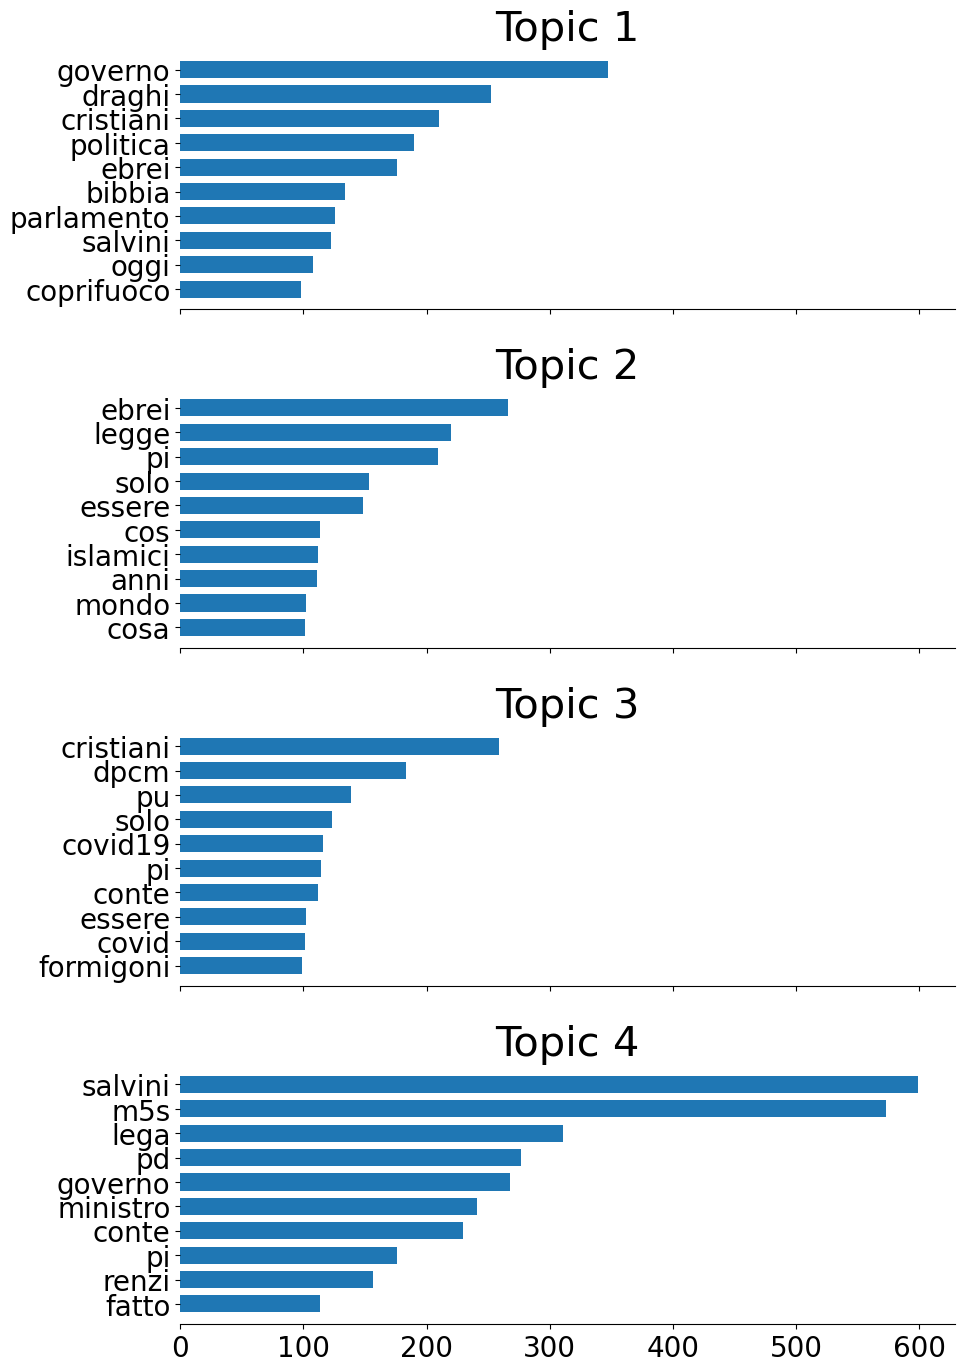

In [12]:
# Plot topics function
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(4,1, figsize=(10, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
# Show topics
n_top_words = 10
#feature_names = vectorizer_cv.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, '')

## Topic Modeling on hate speech dataset

In [ ]:
df_hate.head()